In [53]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 18 16:59:34 2017

@author: Daniel
"""
import glob, numpy
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

def standardize(x):
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)  
    return std_data

# define a function to smooth the data
def movingAv(a,window):
    b = list(a.shape)
    b[0]=b[0]-window+1
    saver = numpy.zeros(b)
    for ind in numpy.arange(window):
        saver=saver+a[ind:a.shape[0]-window+ind+1,]
    saver=saver/window
    return saver

def movingAv1(a,window):
    b = len(a)-window+1
    saver = numpy.zeros(b)
    for ind in numpy.arange(window):
        saver=saver+a[ind:a.shape[0]-window+ind+1,]
    saver=saver/window
    return saver

#def extract_times(files):
def day_time_to_num(date_time):
    
    date_time_stamps = [date_time[i].split('_') for i in range(len(date_time))]
    
    time_in_secs = [((10 * int(date_time_stamps[i][0][6]) + int(date_time_stamps[i][0][7])) * 24 * 60 * 60) +
                    ((10 * int(date_time_stamps[i][1][0]) + int(date_time_stamps[i][1][1])) * 60 * 60) + 
                    ((10 * int(date_time_stamps[i][1][2]) + int(date_time_stamps[i][1][3])) * 60) +
                    (10 * int(date_time_stamps[i][1][4]) + int(date_time_stamps[i][1][5]))
                    for i in range(len(date_time_stamps))]
    print(date_time_stamps[0], time_in_secs[0], (10 * int(date_time_stamps[0][0][6]) + int(date_time_stamps[0][0][7]) * 86400),
         (10 * int(date_time_stamps[0][1][0]) + int(date_time_stamps[0][1][1]) * 60 * 60))
    time_in_secs = [time_in_secs[i] - min(time_in_secs) for i in range(len(time_in_secs))]
    return time_in_secs
def fit_exp_func(times, values):
    try: 
        output, out = curve_fit(func, times, values)
        return output
    except:
        return [0,0,0]
    

In [36]:
#Set location of well to examine
location = "A_5"

# get all file names for one well
files = glob.glob('C:/Users/newho/Documents/robot-Daniel-V1/Test_1/spectrums/201711*' + location + '.txt')

#Generate Time Stamps
filenames = [files[i].split(sep='\\')[1] for i in range(len(files))] 
time_stamps = [filenames[i].replace("_Y_" + location + ".txt", "") for i in range(len(filenames))]
times_in_secs = day_time_to_num(time_stamps)
print(np.max(times_in_secs))
std_times_in_secs = standardize(times_in_secs)
times_in_mins = np.array(times_in_secs) / 60
times_in_hours = times_in_mins / 60
# import one file to get length of data points
scores =  numpy.loadtxt(files[0], delimiter='\t',  skiprows=5)
xvals=scores[:,0]
a = numpy.empty([scores.shape[0],len(files)])

['20171123', '195852'] 2059132 259220 32410
91700


['20171123', '195852'] 2059132 259220 32410
91700
25.4722222222
1010 [[ 2.98265998  0.59727663 -0.42844396]
 [ 3.14284824  0.75011228 -0.37873721]
 [ 3.29040406  1.02592106 -0.31636019]
 ..., 
 [ 3.5778897   0.1873816  -1.31376785]
 [ 3.5784033   0.18700867 -1.31588566]
 [ 3.57802989  0.18697772 -1.31590867]]


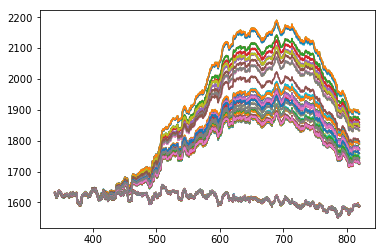

In [35]:
# get the spectrum for each file and store in 'a' columns
for i, file in enumerate(files):
    scores =  numpy.loadtxt(file, delimiter='\t',  skiprows=5)
    a[:,i] = scores[:,1]


#Smooth with a moving filter 
x=movingAv1(xvals,15) # missing x-axis (saved in xvals), keep in mind movingAv function reduces size of 
y=movingAv(a,15) # smooth with a 15 data point window



# plot
plt.plot(x, y)
plt.show()

#plt.plot(times_in_secs[:39], y[index, :39] )
#plt.title("{0}".format(x[index]))




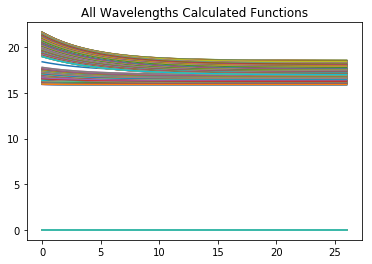

In [46]:
exp_func_params = np.empty([len(y), 3])
for i in range(len(y)):
    exp_func_params[i] = fit_exp_func(times_in_hours[:39], y[i, :39] / 100)
    
xx = linspace(0, 26, 100)

plt.figure()
for i in range(len(exp_func_params)):
    yy = func(xx, exp_func_params[i, 0], exp_func_params[i, 1], exp_func_params[i, 2])
    plt.plot(xx, yy)
plt.title('All Wavelengths Calculated Functions')
#plt.figure()
#plt.plot(std_times_in_secs[:39], standardize(y[index, :39]))
plt.show()

In [54]:
#Fit each spectrum to an exponential decay curve and get it's parameters. Clipped due to spectrometer failure 
index_num = 501
def plotter(index):
    plt.plot(times_in_hours[:39], y[index, :39] / 100)
    plt.plot(times_in_hours[:39], func(times_in_hours[:39], exp_func_params[index, 0], exp_func_params[index, 1], exp_func_params[index, 2]))
    plt.title("{0}".format(x[index]))
    plt.show()
    print(exp_func_params[index, :])
interact(plotter, index = index_num)

<function __main__.plotter>

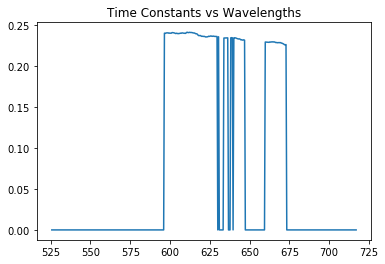

In [50]:
plt.figure()
plt.plot(x[400:800], exp_func_params[400:800, 1])
plt.title('Time Constants vs Wavelengths')
plt.show()
